## Using Data from Kaggle

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

https://www.thebalance.com/average-of-the-open-high-low-and-close-1031216

### Loading CSV Data into DataFrame

In [12]:
btc_df = pd.read_csv("./crypto_data/BCH-USD.csv",
                     names=["timestamp", "open", "high", "low", "close", "vol"])

In [13]:
btc_df["date"] = pd.to_datetime(btc_df.timestamp, unit='s')
btc_df.set_index("date", inplace=True, drop=True)

btc_df.head()

,timestamp,open,high,low,close,vol
date,,,,,,
2018-06-14 09:31:00,1528968660,871.650024,871.729980,871.650024,871.719971,5.675361
2018-06-14 09:32:00,1528968720,870.859985,871.719971,871.719971,870.859985,26.856577
2018-06-14 09:33:00,1528968780,870.099976,871.090027,871.090027,870.099976,1.124300
2018-06-14 09:34:00,1528968840,868.830017,870.950012,868.830017,870.789978,1.749862
2018-06-14 09:35:00,1528968900,870.000000,870.000000,870.000000,870.000000,1.680500


How many nulls rows are there? We can find out and if there are not too many, in comparison to the size of the dataset, we can remove those rows.

In [14]:
pd.isnull(btc_df).sum()

timestamp    0
open         0
high         0
low          0
close        0
vol          0
dtype: int64

We can see that there are no columns which have null values in them.

We can get a sense of how much data we have available to us.

In [15]:
import datetime

print(f"start: {btc_df.index[0]}")
print(f"end: {btc_df.index[-1]}")

start: 2018-06-14 09:31:00
end: 2018-08-25 16:41:00


### OHLC visualisation

In [16]:
fst = lambda series : np.nan if series.empty else series.iloc[0]
lst = lambda series : np.nan if series.empty else series.iloc[-1]

btc_df_daily = btc_df.resample('1D').agg({'timestamp': 'median', 'open': fst, 'high': max, 
                                          'low': min, 'close': lst, 'vol': sum})
btc_df_daily.head()

,timestamp,open,high,low,close,vol
date,,,,,,
2018-06-14,1528994610,871.650024,907.989990,836.250000,897.020020,18463.662770
2018-06-15,1529064540,895.900024,899.250000,836.609985,842.840027,15207.904870
2018-06-16,1529152350,842.010010,859.320007,830.979980,850.099976,10122.110336
2018-06-17,1529239860,850.219971,862.000000,843.859985,846.710022,6252.698768
2018-06-18,1529326260,846.500000,899.409973,826.330017,883.640015,12972.874797


In [17]:
ohlc_avg = lambda row : sum(row) / 4
btc_df_daily["ohlc_avg"] = btc_df_daily[["open", "high", "low", "close"]].apply(ohlc_avg, axis=1)
print(f"size: {btc_df_daily.shape}")
btc_df_daily.head()

size: (73, 7)


,timestamp,open,high,low,close,vol,ohlc_avg
date,,,,,,,
2018-06-14,1528994610,871.650024,907.989990,836.250000,897.020020,18463.662770,878.227508
2018-06-15,1529064540,895.900024,899.250000,836.609985,842.840027,15207.904870,868.650009
2018-06-16,1529152350,842.010010,859.320007,830.979980,850.099976,10122.110336,845.602493
2018-06-17,1529239860,850.219971,862.000000,843.859985,846.710022,6252.698768,850.697495
2018-06-18,1529326260,846.500000,899.409973,826.330017,883.640015,12972.874797,863.970001


Text(0, 0.5, 'OHLC AVG')

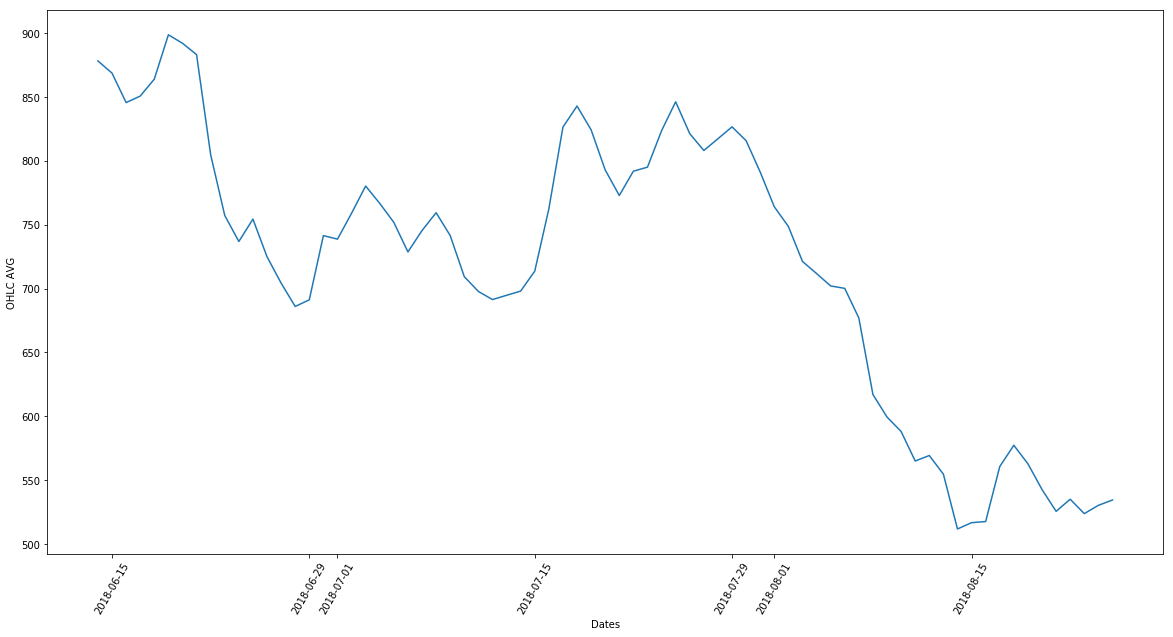

In [18]:
plt.rcParams['figure.figsize'] = (20, 10)

plt.plot(btc_df_daily.index, btc_df_daily.ohlc_avg)
plt.xticks(rotation=60)
plt.xlabel("Dates")
plt.ylabel("OHLC AVG")

https://www.investopedia.com/terms/o/ohlcchart.asp

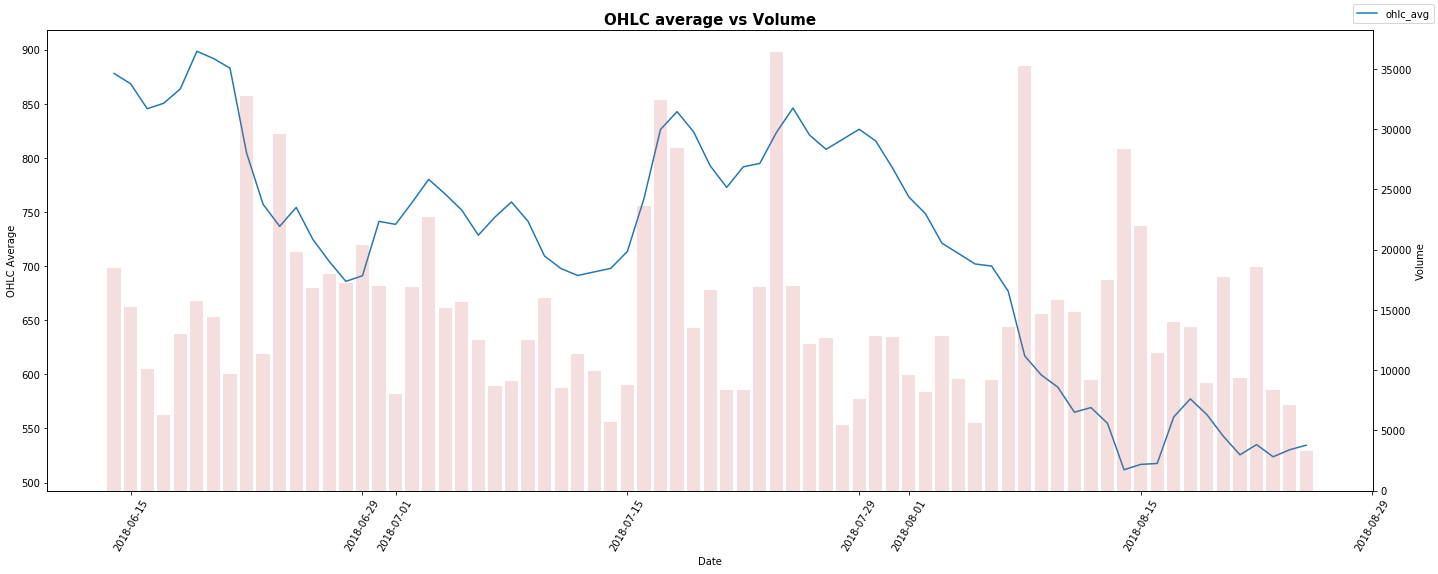

In [76]:
plt.rcParams['figure.figsize'] = (20, 8)

fig, ax1 = plt.subplots()

plt.title("OHLC average vs Volume", fontweight="bold", fontsize=15)

ax1.plot(btc_df_daily.index, btc_df_daily.ohlc_avg)
ax1.set_xticklabels(btc_df_daily.index, rotation=60)
ax1.set_xlabel('Date')
ax1.set_ylabel('OHLC Average')

ax2 = ax1.twinx()
btc_df_daily.vol.astype(np.float64).values
ax2.bar(btc_df_daily.index, btc_df_daily.vol.values, alpha=.2, color="indianred")
ax2.set_ylabel('Volume')

fig.legend()

fig.tight_layout()
plt.show()

In [ ]:
## The box plots for each time interval

### Examining Correlations

In [ ]:
import seaborn as sns

# sns.pairplot(btc_df)

Since the OHLC factors (Open, High, Low, Close) are strongly correlated with each other, we can combine these all into one feature or remove some of them. 